# Load data

In [ ]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
import random
import os

pd.options.display.max_columns = 40

# Process h5ad

In [ ]:
adata = sc.read_h5ad('/groups/doudna/projects/CROPseq_05052022_Connor/Results/TRAC/TRAC_vMarena/cas9ProcessedAneuploidyStatus.h5ad')
adata

AnnData object with n_obs × n_vars = 24483 × 23213
    obs: 'well', 'batch', 'Barcode', 'demux_type', 'assignment', 'guides', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'chr14_residual_expression', 'chr14SingleChrLoss', 'chr14DoubleChrLoss', 'chr14Status', 'chr14Aneuploidy'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mean', 'std'
    uns: 'guides_colors', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'umap', 'well_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [ ]:
# OLD ANEUPLOIDY CALLS
adata.obs.head()

,well,batch,Barcode,demux_type,assignment,guides,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden,chr14_residual_expression,chr14SingleChrLoss,chr14DoubleChrLoss,chr14Status,chr14Aneuploidy
AAACCCACAAGTCATC-1-0,gem_well1,0,AAACCCACAAGTCATC-1-0,singlet,sample_3,GACACCTTCTTCCCCAGCCC_+,5465,5464,32739.0,1223.0,3.735606,15,1.017757,Normal,Normal,Normal,Normal
AAACCCACACACACTA-1-0,gem_well1,0,AAACCCACACACACTA-1-0,singlet,sample_4,TTCTTCCCCAGCCCAGGTAA_+,1755,1755,5627.0,433.0,7.695042,1,0.957014,Normal,Normal,Normal,Normal
AAACCCACACCCATAA-1-0,gem_well1,0,AAACCCACACCCATAA-1-0,singlet,sample_3,GACACCTTCTTCCCCAGCCC_+,5677,5676,32350.0,1356.0,4.191654,13,0.868897,Normal,chr14 loss of 2 copies,chr14 loss of 2 copies,Loss
AAACCCACACGCACCA-1-0,gem_well1,0,AAACCCACACGCACCA-1-0,singlet,sample_3,GACACCTTCTTCCCCAGCCC_+,978,978,1865.0,165.0,8.847185,14,0.979507,Normal,Normal,Normal,Normal
AAACCCACACTGCGAC-1-0,gem_well1,0,AAACCCACACTGCGAC-1-0,singlet,sample_1,AACAAATGTGTCACAAAGTA_+,2512,2512,11139.0,337.0,3.025406,3,1.003965,Normal,Normal,Normal,Normal


# Read infercnv results

In [ ]:
infercnv_raw = pd.read_csv("/groups/doudna/projects/CROPseq_05052022_Connor/Results/TRAC/TRAC_vMarena/GUIDEvsNT_CHR14_RESULTS.txt",
                           sep="\t", low_memory=False, lineterminator='\n')
infercnv_raw.head()


,AAACCCAAGCTAATGA-1-0,AAACCCAAGTATGTAG-1-0,AAACCCACAAGTCATC-1-0,AAACCCACACACACTA-1-0,AAACCCACACCCATAA-1-0,AAACCCACACGCACCA-1-0,AAACCCACACTGCGAC-1-0,AAACCCACAGGACTTT-1-0,AAACCCAGTTGGGTTT-1-0,AAACCCATCAGGTAAA-1-0,AAACCCATCGTTCATT-1-0,AAACGAAAGAAGTCAT-1-0,AAACGAAAGCTAGAAT-1-0,AAACGAACACTCCACT-1-0,AAACGAACATGAAGGC-1-0,AAACGAACATGTGGTT-1-0,AAACGAAGTAGCGTCC-1-0,AAACGAAGTCTTCATT-1-0,AAACGAAGTGGTATGG-1-0,AAACGAAGTTCTAACG-1-0,...,TTTGGTTGTCTTTCAT-1-2,TTTGGTTGTGGCTAGA-1-2,TTTGGTTTCAGCGGAA-1-2,TTTGGTTTCTGCGGAC-1-2,TTTGTTGAGAATTGTG-1-2,TTTGTTGAGAGCATAT-1-2,TTTGTTGAGATCACTC-1-2,TTTGTTGAGATGCGAC-1-2,TTTGTTGAGGGTTAAT-1-2,TTTGTTGAGTACTCGT-1-2,TTTGTTGCAATCCTTT-1-2,TTTGTTGCATGACTAC-1-2,TTTGTTGGTCAAGTTC-1-2,TTTGTTGGTGGATTTC-1-2,TTTGTTGGTTACAGCT-1-2,TTTGTTGGTTCTTGTT-1-2,TTTGTTGGTTGCCGAC-1-2,TTTGTTGTCCGGTAGC-1-2,TTTGTTGTCTAGAACC-1-2,TTTGTTGTCTTCTGGC-1-2
NOC2L,1.0012,0.849651,1.0012,1.0012,1.0012,1.0012,1.0012,1.0012,1.0012,1.0012,1.077336,1.0012,1.0012,1.0012,1.0012,1.0012,1.104550,1.0012,1.0012,1.0012,...,1.0012,1.0012,1.0012,1.092689,1.0012,1.0012,1.0012,1.0012,1.0012,1.0012,1.0012,1.0012,1.0012,1.0012,0.899585,0.858823,1.0012,1.0012,1.0012,1.0012
ISG15,1.0012,0.850954,1.0012,1.0012,1.0012,1.0012,1.0012,1.0012,1.0012,1.0012,1.075401,1.0012,1.0012,1.0012,1.0012,1.0012,1.102684,1.0012,1.0012,1.0012,...,1.0012,1.0012,1.0012,1.092494,1.0012,1.0012,1.0012,1.0012,1.0012,1.0012,1.0012,1.0012,1.0012,1.0012,0.899605,0.859515,1.0012,1.0012,1.0012,1.0012
TNFRSF4,1.0012,0.852281,1.0012,1.0012,1.0012,1.0012,1.0012,1.0012,1.0012,1.0012,1.001200,1.0012,1.0012,1.0012,1.0012,1.0012,1.101304,1.0012,1.0012,1.0012,...,1.0012,1.0012,1.0012,1.092603,1.0012,1.0012,1.0012,1.0012,1.0012,1.0012,1.0012,1.0012,1.0012,1.0012,0.899783,0.860290,1.0012,1.0012,1.0012,1.0012
SDF4,1.0012,0.853454,1.0012,1.0012,1.0012,1.0012,1.0012,1.0012,1.0012,1.0012,1.001200,1.0012,1.0012,1.0012,1.0012,1.0012,1.100130,1.0012,1.0012,1.0012,...,1.0012,1.0012,1.0012,1.092759,1.0012,1.0012,1.0012,1.0012,1.0012,1.0012,1.0012,1.0012,1.0012,1.0012,0.899916,0.860964,1.0012,1.0012,1.0012,1.0012
B3GALT6,1.0012,0.854663,1.0012,1.0012,1.0012,1.0012,1.0012,1.0012,1.0012,1.0012,1.001200,1.0012,1.0012,1.0012,1.0012,1.0012,1.097905,1.0012,1.0012,1.0012,...,1.0012,1.0012,1.0012,1.093177,1.0012,1.0012,1.0012,1.0012,1.0012,1.0012,1.0012,1.0012,1.0012,1.0012,0.900189,0.861720,1.0012,1.0012,1.0012,1.0012


In [ ]:
# remove extra '-1' from barcodes, remove duplicate reference cells
#infercnv_raw.columns = infercnv_raw.columns.str.slice(0,18)
infercnv_raw = infercnv_raw.loc[:,(~pd.Series(infercnv_raw.columns).duplicated().values)]
infercnv_raw.shape[0]

7172

In [ ]:
infercnv_raw.head()

,AAACCCAAGCTAATGA-1-0,AAACCCAAGTATGTAG-1-0,AAACCCACAAGTCATC-1-0,AAACCCACACACACTA-1-0,AAACCCACACCCATAA-1-0,AAACCCACACGCACCA-1-0,AAACCCACACTGCGAC-1-0,AAACCCACAGGACTTT-1-0,AAACCCAGTTGGGTTT-1-0,AAACCCATCAGGTAAA-1-0,AAACCCATCGTTCATT-1-0,AAACGAAAGAAGTCAT-1-0,AAACGAAAGCTAGAAT-1-0,AAACGAACACTCCACT-1-0,AAACGAACATGAAGGC-1-0,AAACGAACATGTGGTT-1-0,AAACGAAGTAGCGTCC-1-0,AAACGAAGTCTTCATT-1-0,AAACGAAGTGGTATGG-1-0,AAACGAAGTTCTAACG-1-0,...,TTTGGTTGTCTTTCAT-1-2,TTTGGTTGTGGCTAGA-1-2,TTTGGTTTCAGCGGAA-1-2,TTTGGTTTCTGCGGAC-1-2,TTTGTTGAGAATTGTG-1-2,TTTGTTGAGAGCATAT-1-2,TTTGTTGAGATCACTC-1-2,TTTGTTGAGATGCGAC-1-2,TTTGTTGAGGGTTAAT-1-2,TTTGTTGAGTACTCGT-1-2,TTTGTTGCAATCCTTT-1-2,TTTGTTGCATGACTAC-1-2,TTTGTTGGTCAAGTTC-1-2,TTTGTTGGTGGATTTC-1-2,TTTGTTGGTTACAGCT-1-2,TTTGTTGGTTCTTGTT-1-2,TTTGTTGGTTGCCGAC-1-2,TTTGTTGTCCGGTAGC-1-2,TTTGTTGTCTAGAACC-1-2,TTTGTTGTCTTCTGGC-1-2
NOC2L,1.0012,0.849651,1.0012,1.0012,1.0012,1.0012,1.0012,1.0012,1.0012,1.0012,1.077336,1.0012,1.0012,1.0012,1.0012,1.0012,1.104550,1.0012,1.0012,1.0012,...,1.0012,1.0012,1.0012,1.092689,1.0012,1.0012,1.0012,1.0012,1.0012,1.0012,1.0012,1.0012,1.0012,1.0012,0.899585,0.858823,1.0012,1.0012,1.0012,1.0012
ISG15,1.0012,0.850954,1.0012,1.0012,1.0012,1.0012,1.0012,1.0012,1.0012,1.0012,1.075401,1.0012,1.0012,1.0012,1.0012,1.0012,1.102684,1.0012,1.0012,1.0012,...,1.0012,1.0012,1.0012,1.092494,1.0012,1.0012,1.0012,1.0012,1.0012,1.0012,1.0012,1.0012,1.0012,1.0012,0.899605,0.859515,1.0012,1.0012,1.0012,1.0012
TNFRSF4,1.0012,0.852281,1.0012,1.0012,1.0012,1.0012,1.0012,1.0012,1.0012,1.0012,1.001200,1.0012,1.0012,1.0012,1.0012,1.0012,1.101304,1.0012,1.0012,1.0012,...,1.0012,1.0012,1.0012,1.092603,1.0012,1.0012,1.0012,1.0012,1.0012,1.0012,1.0012,1.0012,1.0012,1.0012,0.899783,0.860290,1.0012,1.0012,1.0012,1.0012
SDF4,1.0012,0.853454,1.0012,1.0012,1.0012,1.0012,1.0012,1.0012,1.0012,1.0012,1.001200,1.0012,1.0012,1.0012,1.0012,1.0012,1.100130,1.0012,1.0012,1.0012,...,1.0012,1.0012,1.0012,1.092759,1.0012,1.0012,1.0012,1.0012,1.0012,1.0012,1.0012,1.0012,1.0012,1.0012,0.899916,0.860964,1.0012,1.0012,1.0012,1.0012
B3GALT6,1.0012,0.854663,1.0012,1.0012,1.0012,1.0012,1.0012,1.0012,1.0012,1.0012,1.001200,1.0012,1.0012,1.0012,1.0012,1.0012,1.097905,1.0012,1.0012,1.0012,...,1.0012,1.0012,1.0012,1.093177,1.0012,1.0012,1.0012,1.0012,1.0012,1.0012,1.0012,1.0012,1.0012,1.0012,0.900189,0.861720,1.0012,1.0012,1.0012,1.0012


# Process gene location metadata

In [ ]:
gene_locs = pd.read_csv('/groups/doudna/projects/CROPseq_05052022_Connor/Results/TRAC/inferCNVgeneName.txt', sep = '\t', names = ['gene', 'chrom', 'start', 'end'])
gene_to_chrom = gene_locs.set_index('gene')['chrom']

infercnv_raw['chrom'] = infercnv_raw.index.map(gene_to_chrom)
mean_chrom_values_per_cell = infercnv_raw[infercnv_raw['chrom'].str.startswith('chr')].groupby('chrom').mean()\
        .transpose()
adata.obsm['infercnv_chrom_avg'] = mean_chrom_values_per_cell[['chr%d' % (i + 1) for i in range(22)]].reindex(adata.obs.index)
#adata.obsm['infercnv_chrom_avg'] = mean_chrom_values_per_cell[['chr14']].reindex(adata.obs.index)


In [ ]:
mean_chrom_values_per_cell

chrom,chr1,chr10,chr11,chr12,chr13,chr14,chr15,chr16,chr17,chr18,chr19,chr2,chr20,chr21,chr22,chr3,chr4,chr5,chr6,chr7,chr8,chr9
AAACCCAAGCTAATGA-1-0,1.001910,0.997961,1.005018,1.007659,1.022052,0.989307,1.010347,1.008539,1.005720,1.075558,0.992151,0.988295,0.989175,1.024555,0.925783,1.010497,0.993191,1.003333,1.030904,0.967559,1.025764,1.040900
AAACCCAAGTATGTAG-1-0,1.010474,0.987286,1.044184,0.994915,1.044225,1.038785,1.002752,0.977392,0.985509,0.983360,0.963114,0.981965,0.942018,1.025636,1.003465,1.026377,1.013643,1.035072,1.034468,1.035893,0.996931,0.998903
AAACCCACAAGTCATC-1-0,1.005595,1.001200,1.001200,1.010165,1.001200,1.017757,1.001200,0.996555,1.003486,1.001200,1.001200,1.001200,1.001200,1.001200,1.001200,0.998833,1.001200,1.001200,0.983781,1.001200,1.001200,1.002239
AAACCCACACACACTA-1-0,1.016414,1.017270,1.007656,1.007451,1.001200,0.957014,0.975207,1.016782,0.998119,1.001200,1.016123,1.004201,0.973191,1.024817,1.001200,1.034203,0.997200,1.005607,1.004059,1.002142,1.001200,1.001200
AAACCCACACCCATAA-1-0,1.003619,0.993154,1.001200,1.026396,1.001200,0.868897,1.001200,1.001200,0.998039,1.001200,0.996402,1.001200,1.001200,0.980102,0.994107,1.001200,1.001200,1.001200,0.992351,1.001200,0.999091,1.001200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGGTTCTTGTT-1-2,1.015586,1.001200,1.016979,1.001200,1.019367,1.002333,1.045470,1.006324,0.984655,1.001200,0.933997,1.017595,0.932475,1.063565,0.991428,1.006472,0.994780,1.000387,1.014561,0.997495,1.005767,0.963618
TTTGTTGGTTGCCGAC-1-2,0.995429,0.977842,1.002854,0.991642,1.001200,1.025076,0.998446,1.001200,0.997310,1.001200,1.010297,1.010895,1.001200,1.076063,1.015757,0.987695,1.003776,0.991273,1.008705,1.001200,1.001200,0.987540
TTTGTTGTCCGGTAGC-1-2,1.003798,0.997369,1.001200,1.007933,0.969070,1.005883,1.001200,1.001200,1.005346,1.013742,1.004408,1.010638,1.001200,1.001200,1.001200,1.001200,1.001200,0.988181,1.031811,1.001200,1.001200,1.011196
TTTGTTGTCTAGAACC-1-2,1.045399,1.018012,1.019181,1.024247,0.994710,0.920937,1.062408,0.990926,0.984379,1.023048,0.956739,1.017933,1.001200,1.010865,0.934684,1.030356,1.007564,1.025254,0.977744,1.032590,1.002723,0.993908


In [ ]:
adata.obsm['infercnv_chrom_avg'].loc[adata.obsm['infercnv_chrom_avg'].chr14.isna()]

chrom,chr1,chr2,chr3,chr4,chr5,chr6,chr7,chr8,chr9,chr10,chr11,chr12,chr13,chr14,chr15,chr16,chr17,chr18,chr19,chr20,chr21,chr22


In [ ]:
adata.obs

,well,batch,Barcode,demux_type,assignment,guides,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden,chr14_residual_expression,chr14SingleChrLoss,chr14DoubleChrLoss,chr14Status,chr14Aneuploidy
AAACCCACAAGTCATC-1-0,gem_well1,0,AAACCCACAAGTCATC-1-0,singlet,sample_3,GACACCTTCTTCCCCAGCCC_+,5465,5464,32739.0,1223.0,3.735606,15,1.017757,Normal,Normal,Normal,Normal
AAACCCACACACACTA-1-0,gem_well1,0,AAACCCACACACACTA-1-0,singlet,sample_4,TTCTTCCCCAGCCCAGGTAA_+,1755,1755,5627.0,433.0,7.695042,1,0.957014,Normal,Normal,Normal,Normal
AAACCCACACCCATAA-1-0,gem_well1,0,AAACCCACACCCATAA-1-0,singlet,sample_3,GACACCTTCTTCCCCAGCCC_+,5677,5676,32350.0,1356.0,4.191654,13,0.868897,Normal,chr14 loss of 2 copies,chr14 loss of 2 copies,Loss
AAACCCACACGCACCA-1-0,gem_well1,0,AAACCCACACGCACCA-1-0,singlet,sample_3,GACACCTTCTTCCCCAGCCC_+,978,978,1865.0,165.0,8.847185,14,0.979507,Normal,Normal,Normal,Normal
AAACCCACACTGCGAC-1-0,gem_well1,0,AAACCCACACTGCGAC-1-0,singlet,sample_1,AACAAATGTGTCACAAAGTA_+,2512,2512,11139.0,337.0,3.025406,3,1.003965,Normal,Normal,Normal,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGGTGGATTTC-1-2,gem_well3,2,TTTGTTGGTGGATTTC-1-2,singlet,sample_12,Non-targeting,3127,3127,12347.0,536.0,4.341136,0,0.999116,Normal,Normal,Normal,Normal
TTTGTTGGTTGCCGAC-1-2,gem_well3,2,TTTGTTGGTTGCCGAC-1-2,singlet,sample_9,CTTACCTGGGCTGGGGAAGA_-,2894,2894,9639.0,501.0,5.197635,17,1.025076,Normal,Normal,Normal,Normal
TTTGTTGTCCGGTAGC-1-2,gem_well3,2,TTTGTTGTCCGGTAGC-1-2,singlet,sample_9,CTTACCTGGGCTGGGGAAGA_-,2910,2910,11148.0,263.0,2.359168,12,1.005883,Normal,Normal,Normal,Normal
TTTGTTGTCTAGAACC-1-2,gem_well3,2,TTTGTTGTCTAGAACC-1-2,singlet,sample_11,TGTGCTAGACATGAGGTCTA_BioRxiv/June,2944,2944,7862.0,713.0,9.068939,14,0.920937,chr14 loss of 1 copy,Normal,chr14 loss of 1 copy,Loss


In [ ]:
adata.obs.demux_type.value_counts()

demux_type
singlet    24483
Name: count, dtype: int64

In [ ]:

adata.obs['target'] = 'TRAC'
#adata.obs.loc[adata.obs['guidePvalue'] > 0.05, 'target'] = np.nan
adata.obs['target_chrom'] = adata.obs['target'].map(gene_to_chrom)

adata.obs['has_infercnv'] = ~pd.isnull(adata.obsm['infercnv_chrom_avg']).any(axis = 1)
adata.obs['lost_chroms'] = (adata.obsm['infercnv_chrom_avg'] <= 0.95).apply(lambda cell_mask: \
        set(cell_mask.index[cell_mask]), axis = 1)
adata.obs.loc[~adata.obs['has_infercnv'], 'lost_chroms'] = np.nan

adata.obs.head()


,well,batch,Barcode,demux_type,assignment,guides,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden,chr14_residual_expression,chr14SingleChrLoss,chr14DoubleChrLoss,chr14Status,chr14Aneuploidy,target,target_chrom,has_infercnv,lost_chroms
AAACCCACAAGTCATC-1-0,gem_well1,0,AAACCCACAAGTCATC-1-0,singlet,sample_3,GACACCTTCTTCCCCAGCCC_+,5465,5464,32739.0,1223.0,3.735606,15,1.017757,Normal,Normal,Normal,Normal,TRAC,chr14,True,{}
AAACCCACACACACTA-1-0,gem_well1,0,AAACCCACACACACTA-1-0,singlet,sample_4,TTCTTCCCCAGCCCAGGTAA_+,1755,1755,5627.0,433.0,7.695042,1,0.957014,Normal,Normal,Normal,Normal,TRAC,chr14,True,{}
AAACCCACACCCATAA-1-0,gem_well1,0,AAACCCACACCCATAA-1-0,singlet,sample_3,GACACCTTCTTCCCCAGCCC_+,5677,5676,32350.0,1356.0,4.191654,13,0.868897,Normal,chr14 loss of 2 copies,chr14 loss of 2 copies,Loss,TRAC,chr14,True,{chr14}
AAACCCACACGCACCA-1-0,gem_well1,0,AAACCCACACGCACCA-1-0,singlet,sample_3,GACACCTTCTTCCCCAGCCC_+,978,978,1865.0,165.0,8.847185,14,0.979507,Normal,Normal,Normal,Normal,TRAC,chr14,True,{}
AAACCCACACTGCGAC-1-0,gem_well1,0,AAACCCACACTGCGAC-1-0,singlet,sample_1,AACAAATGTGTCACAAAGTA_+,2512,2512,11139.0,337.0,3.025406,3,1.003965,Normal,Normal,Normal,Normal,TRAC,chr14,True,{}


# Breakpoint calling

In [ ]:
for chrom in ['chr14']:
#for chrom in sorted(list(set(infercnv_raw['chrom']))):
    print(chrom)
    if chrom[0] != "c":
        continue

    #if chrom != "chr12":
    #    continue

    locs = pd.Series(infercnv_raw.loc[infercnv_raw['chrom'] == chrom,:].index)
    locs = locs.apply(lambda x: gene_locs.loc[gene_locs['gene'] == x, "start"].values[0])
    order = np.argsort(locs)
    vals = infercnv_raw.loc[infercnv_raw['chrom'] == chrom, adata[adata.obs['has_infercnv']].obs.index]
    locs = locs[order].to_numpy()
    vals = vals.iloc[order,:].to_numpy()
    vals_binary = (vals > 0.95).astype(int)

    left_binary = np.cumsum(vals_binary, axis = 0)[:-1]
    left_binary_den = (np.array(list(range(vals_binary.shape[0] - 1))) + 1)[:,None]
    left_binary = left_binary/left_binary_den
    right_binary = np.cumsum(vals_binary[::-1], axis = 0)[:-1][::-1]
    right_binary_den = (np.array(list(range(vals_binary.shape[0] - 1))) + 1)[:,None][::-1]
    right_binary = right_binary/right_binary_den
    breakpoints = np.argmax(np.abs(left_binary - right_binary), axis = 0)

    left_binary_avg = left_binary[breakpoints, range(len(breakpoints))]
    right_binary_avg = right_binary[breakpoints, range(len(breakpoints))]

    left = np.cumsum(vals, axis = 0)[:-1]
    left_den = (np.array(list(range(vals.shape[0] - 1))) + 1)[:,None]
    left = left/left_den
    right = np.cumsum(vals[::-1], axis = 0)[:-1][::-1]
    right_den = (np.array(list(range(vals.shape[0] - 1))) + 1)[:,None][::-1]
    right = right/right_den

    left_avg = left[breakpoints, range(len(breakpoints))]
    right_avg = right[breakpoints, range(len(breakpoints))]

    locs = np.tile(locs, (len(breakpoints), 1))
    locs1 = locs[range(len(breakpoints)), breakpoints]
    locs2 = locs[range(len(breakpoints)), breakpoints + 1]

    breakpoint_locs = np.mean(np.vstack([locs1, locs2]), axis = 0)

    #print(len(locs))
    #print(vals_binary.shape)

    adata.obs.loc[adata.obs['has_infercnv'], chrom + "_bp_loc"] = breakpoint_locs
    adata.obs.loc[adata.obs['has_infercnv'], chrom + "_bp_n"] = breakpoints
    adata.obs.loc[adata.obs['has_infercnv'], chrom + "_left"] = left_avg
    adata.obs.loc[adata.obs['has_infercnv'], chrom + "_right"] = right_avg
    adata.obs.loc[adata.obs['has_infercnv'], chrom + "_left_binary"] = left_binary_avg
    adata.obs.loc[adata.obs['has_infercnv'], chrom + "_right_binary"] = right_binary_avg
    adata.obs.loc[adata.obs['has_infercnv'], chrom + "_left_n"] = breakpoints + 1
    adata.obs.loc[adata.obs['has_infercnv'], chrom + "_right_n"] = vals.shape[0] - (breakpoints + 1)
    adata.obs.loc[adata.obs['has_infercnv'], chrom + "_binary"] = np.mean(vals_binary, axis = 0)

chr14


In [ ]:
cols = adata.obs.columns[adata.obs.columns.str.contains("bp") | adata.obs.columns.str.contains("right") |
                 adata.obs.columns.str.contains("left") | adata.obs.columns.str.contains("binary") |
                 adata.obs.columns.str.contains("event")       ]
#adata.obs.loc[:,cols].to_csv("/groups/doudna/projects/CROPseq_05052022_Connor/Results/TRAC/aneuploidy_events.csv")

# Updated definitions

In [ ]:
aneuploidy_events = pd.read_csv("/groups/doudna/projects/CROPseq_05052022_Connor/Results/TRAC/TRAC_vMarena/aneuploidy_events.csv", index_col = 0)

In [ ]:
LOSS_FRAC = 0.7
MIN_GENES = 150

for chrom in ('chr%d' % i for i in range(1, 23)):

    left_binary = aneuploidy_events['%s_left_binary' % chrom]
    left_n = aneuploidy_events['%s_left_n' % chrom]
    right_binary = aneuploidy_events['%s_right_binary' % chrom]
    right_n = aneuploidy_events['%s_right_n' % chrom]
    total_binary = (left_n * left_binary + right_n * right_binary) / (left_n + right_n)

    lost_all = (total_binary <= 1 - LOSS_FRAC)
    lost_left = (left_binary <= 1 - LOSS_FRAC)
    lost_right = (right_binary <= 1 - LOSS_FRAC)
    lost_only_left = lost_left & (~lost_right)
    lost_only_right = lost_right & (~lost_left)
    enough_genes_left = (left_n >= MIN_GENES)
    enough_genes_right = (right_n >= MIN_GENES)
    lost_partial = (lost_only_left & enough_genes_left) | (lost_only_right & enough_genes_right)

    event = np.where(lost_partial, 'lost_partial', np.where(lost_all, 'lost_all', 'no_loss'))
    aneuploidy_events['%s_event' % chrom] = event

In [ ]:
for chrom in ('chr%d' % i for i in range(1, 23)):
    print('%s: %s' % (chrom, aneuploidy_events['%s_event' % chrom].value_counts().to_dict()))

chr1: {'no_loss': 24359, 'lost_partial': 116, 'lost_all': 8}
chr2: {'no_loss': 24327, 'lost_partial': 142, 'lost_all': 14}
chr3: {'no_loss': 24415, 'lost_partial': 54, 'lost_all': 14}
chr4: {'no_loss': 24405, 'lost_partial': 61, 'lost_all': 17}
chr5: {'no_loss': 24341, 'lost_partial': 130, 'lost_all': 12}
chr6: {'no_loss': 24241, 'lost_partial': 225, 'lost_all': 17}
chr7: {'no_loss': 24402, 'lost_partial': 70, 'lost_all': 11}
chr8: {'no_loss': 24418, 'lost_partial': 54, 'lost_all': 11}
chr9: {'no_loss': 24395, 'lost_partial': 73, 'lost_all': 15}
chr10: {'no_loss': 24375, 'lost_partial': 87, 'lost_all': 21}
chr11: {'no_loss': 24444, 'lost_partial': 30, 'lost_all': 9}
chr12: {'no_loss': 24408, 'lost_partial': 60, 'lost_all': 15}
chr13: {'no_loss': 24332, 'lost_all': 151}
chr14: {'no_loss': 22112, 'lost_partial': 1191, 'lost_all': 1180}
chr15: {'no_loss': 24424, 'lost_all': 31, 'lost_partial': 28}
chr16: {'no_loss': 24433, 'lost_partial': 33, 'lost_all': 17}
chr17: {'no_loss': 24382, 'los

In [ ]:
#### TABULATE EVENTS PER GUIDE: Fig 1E Raw Data ####
temp = pd.DataFrame(adata.obs["guides"])
merged = pd.merge(aneuploidy_events, temp, left_index=True, right_index=True)
grouped = merged.groupby(["guides"])

#event_list = [x for x in gg.columns if "event" in x]
types = ["no_loss", "lost_partial", "lost_all"]
guide_dfs = []

for g in list(grouped.groups):
    gg = grouped.get_group(g)
    dfs = []
    for chrom in ('chr%d' % i for i in range(1, 23)):
        temp_series = gg[f"{chrom}_event"].value_counts()
        temp_df = pd.DataFrame(temp_series).T
        cols = temp_df.columns
        missing_cols = [x for x in types if x not in cols]
        for miss in missing_cols:
            temp_df[miss] = 0
        temp_df.columns = [f"{chrom}_{x}" for x in temp_df.columns]
        temp_df["Guide"] = g
        temp_df.set_index("Guide", inplace = True)
        dfs.append(temp_df)
    guide_df = pd.concat(dfs, axis = 1)
    guide_dfs.append(guide_df)

final_df = pd.concat(guide_dfs)
#final_df.to_excel("TRAC_Aneuploidy_Events_AllChromo.xlsx", index=False)

In [ ]:
final_df.head(12)

,chr1_no_loss,chr1_lost_partial,chr1_lost_all,chr2_no_loss,chr2_lost_partial,chr2_lost_all,chr3_no_loss,chr3_lost_partial,chr3_lost_all,chr4_no_loss,chr4_lost_partial,chr4_lost_all,chr5_no_loss,chr5_lost_partial,chr5_lost_all,chr6_no_loss,chr6_lost_partial,chr6_lost_all,chr7_no_loss,chr7_lost_partial,...,chr16_lost_partial,chr16_lost_all,chr17_no_loss,chr17_lost_partial,chr17_lost_all,chr18_no_loss,chr18_lost_all,chr18_lost_partial,chr19_no_loss,chr19_lost_partial,chr19_lost_all,chr20_no_loss,chr20_lost_partial,chr20_lost_all,chr21_no_loss,chr21_lost_all,chr21_lost_partial,chr22_no_loss,chr22_lost_all,chr22_lost_partial
Guide,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AACAAATGTGTCACAAAGTA_+,2034,19,1,2038,14,2,2046,7,1,2049,3,2,2039,15,0,2027,25,2,2045,8,...,4,1,2032,20,2,2031,23,0,2046,5,3,2049,3,2,1993,61,0,2049,5,0
CTTCAAGAGCAACAGTGCTG_+,2744,11,2,2736,20,1,2749,5,3,2747,8,2,2747,8,2,2726,30,1,2748,9,...,3,4,2746,10,1,2737,20,0,2751,5,1,2756,0,1,2668,89,0,2754,3,0
GACACCTTCTTCCCCAGCCC_+,2063,10,1,2059,14,1,2068,6,0,2066,7,1,2033,41,0,2042,32,0,2060,13,...,0,1,2067,7,0,2049,25,0,2011,54,9,2072,1,1,1982,92,0,2069,3,2
TTCTTCCCCAGCCCAGGTAA_+,2127,14,0,2123,16,2,2137,3,1,2137,2,2,2124,15,2,2112,27,2,2133,6,...,3,2,2130,9,2,2121,20,0,2134,6,1,2135,4,2,2056,85,0,2137,3,1
CTTCTTCCCCAGCCCAGGTA_+,1151,4,0,1146,8,1,1152,2,1,1150,4,1,1147,6,2,1141,12,2,1154,0,...,2,0,1152,3,0,1149,6,0,1153,2,0,1151,0,4,1122,33,0,1151,3,1
GCTGGTACACGGCAGGGTCA_-,2046,8,1,2043,11,1,2048,5,2,2048,6,1,2045,9,1,2039,15,1,2051,3,...,1,1,2051,4,0,2048,7,0,2044,10,1,2051,1,3,2001,54,0,2052,3,0
GAGAATCAAAATCGGTGAAT_-,1776,6,0,1770,12,0,1778,1,3,1772,6,4,1768,11,3,1767,13,2,1774,7,...,0,3,1775,4,3,1767,15,0,1776,6,0,1776,1,5,1711,71,0,1778,4,0
TCTCTCAGCTGGTACACGGC_-,2193,15,2,2193,15,2,2200,8,2,2204,6,0,2202,8,0,2185,22,3,2200,6,...,3,0,2203,6,1,2192,18,0,2195,15,0,2207,2,1,2098,112,0,2206,2,2
CTTACCTGGGCTGGGGAAGA_-,2107,7,0,2104,8,2,2109,5,0,2109,4,1,2107,6,1,2100,13,1,2110,4,...,1,1,2105,7,2,2098,16,0,2108,5,1,2113,0,1,2062,52,0,2108,5,1


In [ ]:
for g in list(grouped.groups):
    gg = grouped.get_group(g)
    dfs = []
    temp_series = gg[f"chr14_event"].value_counts()
    print(g, ":",temp_series)

AACAAATGTGTCACAAAGTA_+ : chr14_event
no_loss         1953
lost_partial      53
lost_all          48
Name: count, dtype: int64
CTTCAAGAGCAACAGTGCTG_+ : chr14_event
no_loss         2369
lost_all         209
lost_partial     179
Name: count, dtype: int64
GACACCTTCTTCCCCAGCCC_+ : chr14_event
no_loss         1849
lost_partial     114
lost_all         111
Name: count, dtype: int64
TTCTTCCCCAGCCCAGGTAA_+ : chr14_event
no_loss         1890
lost_partial     131
lost_all         120
Name: count, dtype: int64
CTTCTTCCCCAGCCCAGGTA_+ : chr14_event
no_loss         1063
lost_all          60
lost_partial      32
Name: count, dtype: int64
GCTGGTACACGGCAGGGTCA_- : chr14_event
no_loss         1937
lost_partial      61
lost_all          57
Name: count, dtype: int64
GAGAATCAAAATCGGTGAAT_- : chr14_event
no_loss         1621
lost_all          84
lost_partial      77
Name: count, dtype: int64
TCTCTCAGCTGGTACACGGC_- : chr14_event
no_loss         1802
lost_partial     205
lost_all         203
Name: count, dtype

In [ ]:
#### INSPECT AND SAVE RESULTS SUMMARY FOR TRAC ####
chr_14 = [x for x in final_df.columns if "chr14" in x]
temp = final_df[chr_14]
temp["Guide_ID"] = [1, 2, 3, 4, 5, 6, 7, 8 , 9, 10, 11, "Non_Targeting"]
#temp.to_excel("TRAC_Aneuploidy_Events_Chromo14.xlsx")
temp["Targeting"] = "Non"
temp.loc[temp.index != "Non-targeting", "Targeting"] = "Targeting"
temp.reset_index(inplace=True)
temp.head(12)

/tmp/ipykernel_2068786/1188520953.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["Guide_ID"] = [1, 2, 3, 4, 5, 6, 7, 8 , 9, 10, 11, "Non_Targeting"]
/tmp/ipykernel_2068786/1188520953.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["Targeting"] = "Non"


,Guide,chr14_no_loss,chr14_lost_partial,chr14_lost_all,Guide_ID,Targeting
0,AACAAATGTGTCACAAAGTA_+,1953,53,48,1,Targeting
1,CTTCAAGAGCAACAGTGCTG_+,2369,179,209,2,Targeting
2,GACACCTTCTTCCCCAGCCC_+,1849,114,111,3,Targeting
3,TTCTTCCCCAGCCCAGGTAA_+,1890,131,120,4,Targeting
4,CTTCTTCCCCAGCCCAGGTA_+,1063,32,60,5,Targeting
5,GCTGGTACACGGCAGGGTCA_-,1937,61,57,6,Targeting
6,GAGAATCAAAATCGGTGAAT_-,1621,77,84,7,Targeting
7,TCTCTCAGCTGGTACACGGC_-,1802,205,203,8,Targeting
8,CTTACCTGGGCTGGGGAAGA_-,1899,117,98,9,Targeting
9,CTCTCAGCTGGTACACGGCA_-,2270,112,99,10,Targeting


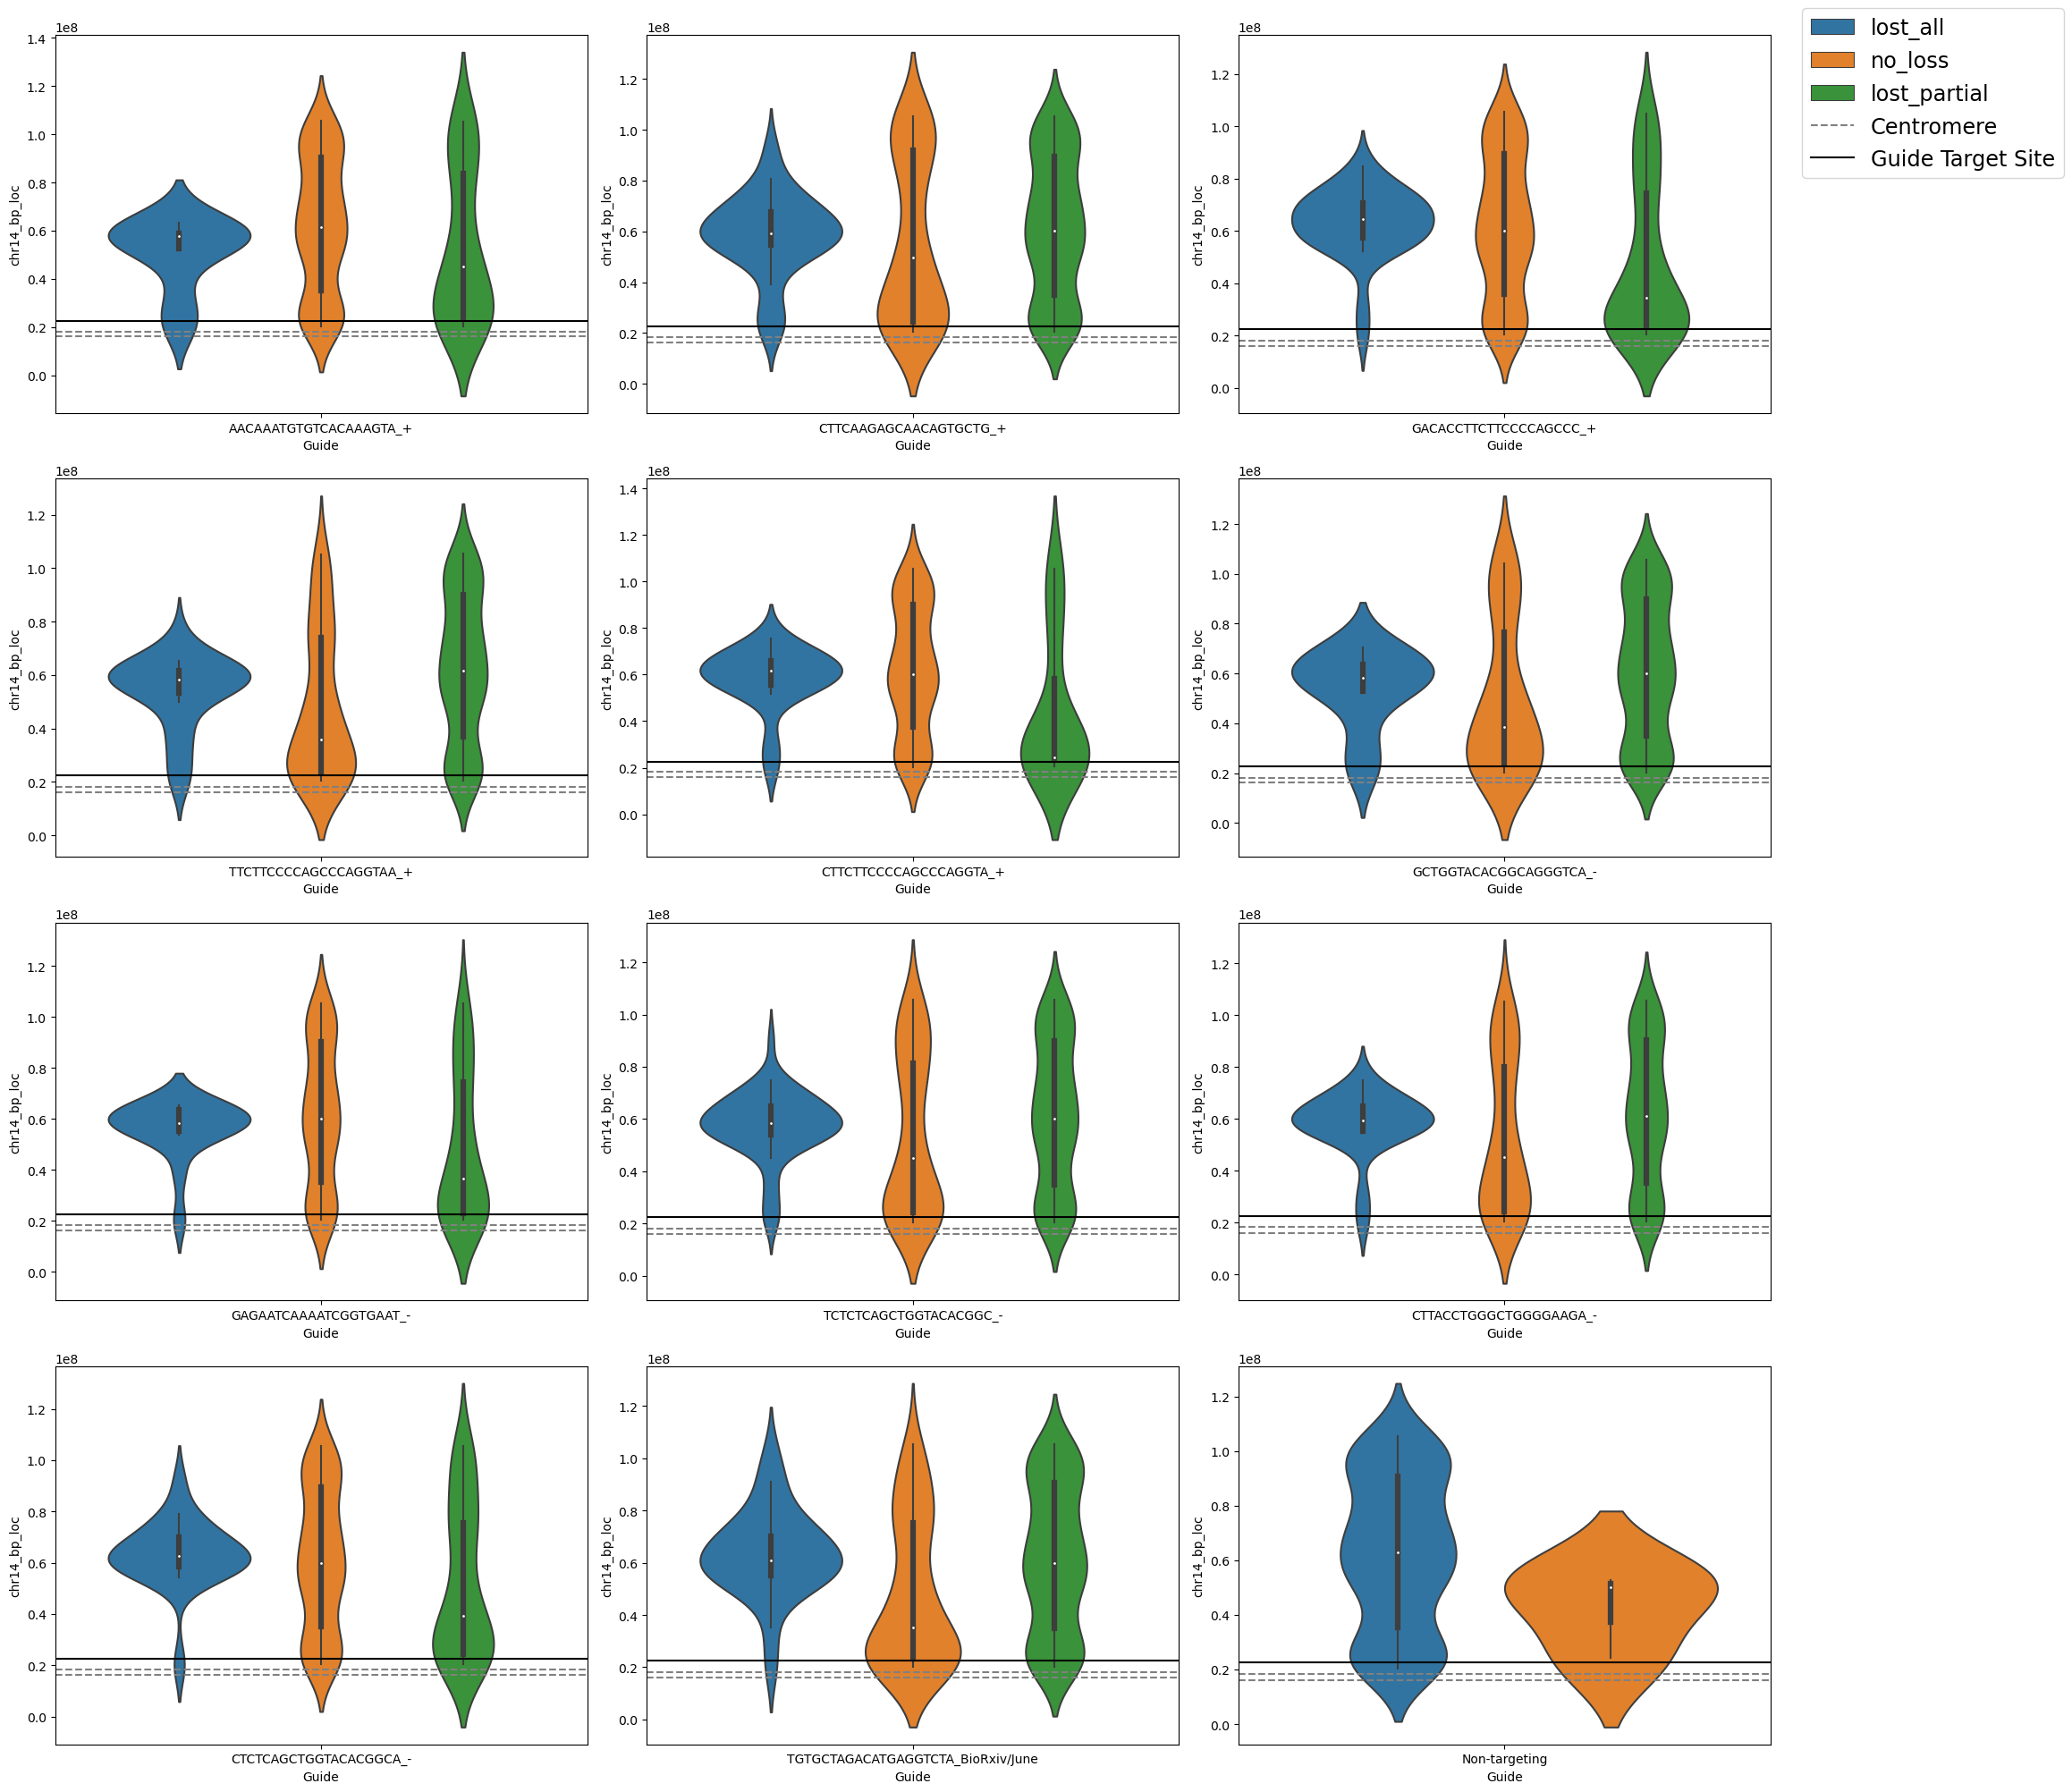

In [ ]:
#### TABULATE EVENTS PER GUIDE ####
temp = pd.DataFrame(adata.obs["guides"])
merged = pd.merge(aneuploidy_events, temp, left_index=True, right_index=True)
merged["Targeting"] = "Non-Targeting"
merged.loc[merged.guides != "Non-targeting", "Targeting"] = "Targeting"
grouped = merged.groupby(["guides"])

event_list = [x for x in merged.columns if "loc" in x]
types = ["no_loss", "lost_partial", "lost_all"]
dfs = []
i=0

for g in list(grouped.groups):
    gg = grouped.get_group(g)
    slice_chr14 = gg[["chr14_bp_loc", "chr14_event"]]
    temp_df = pd.DataFrame(slice_chr14.groupby(["chr14_bp_loc", "chr14_event"]).value_counts()).reset_index()
    temp_df.columns = ["chr14_bp_loc", "chr14_event", "Counts"]
    temp_df["Guide"] = g
    dfs.append(temp_df)
    i+=1

p11_1 = 16100001 #"chr14:16100001-17200000"
q14_1 = 18200000 #"chr14:17200001-18200000"
trac_midpoint = np.mean([gene_locs.loc[gene_locs.gene == "TRAC"].start, gene_locs.loc[gene_locs.gene == "TRAC"].end])

fig, axes = plt.subplots(4,3, figsize = (20,20))
axs = axes.ravel()
i = 0

for df in dfs:
    graph = sns.violinplot(data=df, x="Guide", y="chr14_bp_loc", hue="chr14_event", ax = axs[i])
    graph.axhline(y = p11_1, color = 'grey', linestyle = '--', label = "Centromere")
    graph.axhline(y = q14_1, color = 'grey', linestyle = '--')
    graph.axhline(y = trac_midpoint, color = 'black', linestyle = '-', label = "Guide Target Site")
    axs[i].get_legend().remove()
    i+=1

handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels,
          bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0, fontsize = "xx-large")

plt.tight_layout()
plt.savefig("Breakpoint_Violins_Separate_Guides.svg", bbox_inches='tight')

Text(0.5, 0, '')

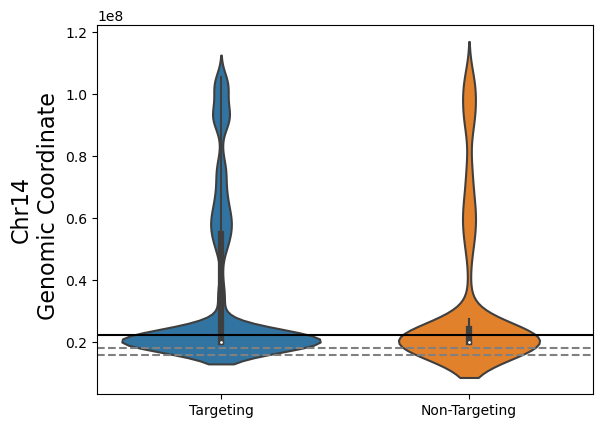

In [ ]:
# CHECK x-axis annot: print(list(merged.loc[merged.Targeting != "Non-Targeting"].guides.unique()))
graph = sns.violinplot(data=merged, x = "Targeting", y="chr14_bp_loc")#, hue="chr14_event")
graph.axhline(y = p11_1, color = 'grey', linestyle = '--', label = "Centromere")
graph.axhline(y = q14_1, color = 'grey', linestyle = '--')
graph.axhline(y = trac_midpoint, color = 'black', linestyle = '-', label = "Guide Target Site")
plt.ylabel("Chr14\n Genomic Coordinate", size = 16)
plt.xlabel("")

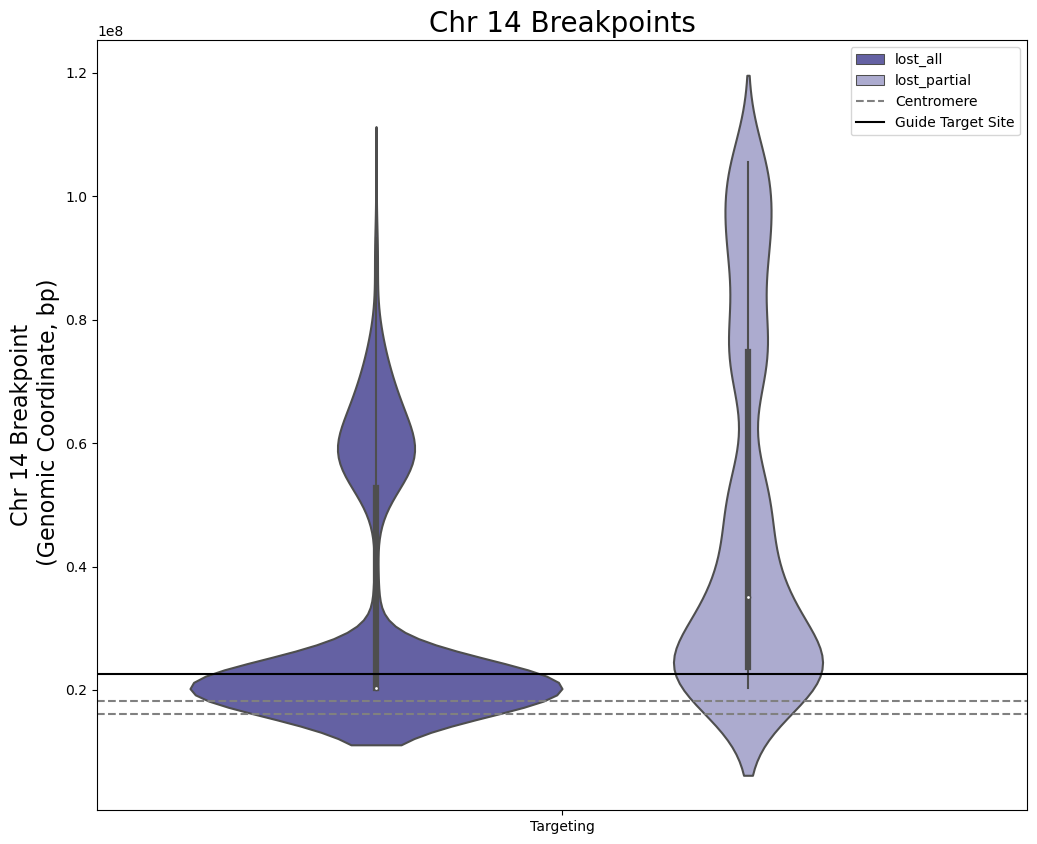

In [ ]:
#### FINAL FIG1C ####
#dark_blue = (90, 86, 174, 1) #"#5a56ae"
#light_blue = (167, 165, 213, 1) #"#a7a5d5"

plt.figure(figsize=(12,10))
temp = merged.loc[(merged.chr14_event != "no_loss")&(merged.Targeting != "Non-Targeting")]
graph = sns.violinplot(data = temp, x = "Targeting", y="chr14_bp_loc", hue="chr14_event",
                       palette={'lost_all': "#5a56ae", 'lost_partial': "#a7a5d5"})
graph.axhline(y = p11_1, color = 'grey', linestyle = '--', label = "Centromere")
graph.axhline(y = q14_1, color = 'grey', linestyle = '--')
graph.axhline(y = trac_midpoint, color = 'black', linestyle = '-', label = "Guide Target Site")
plt.ylabel("Chr 14 Breakpoint\n (Genomic Coordinate, bp)", size = 16)
plt.xlabel("")
plt.legend(title = None)
plt.title("Chr 14 Breakpoints", size=20)
plt.savefig("Breakpoint_Chr14Event_TargetingvsNonTargeting.svg")

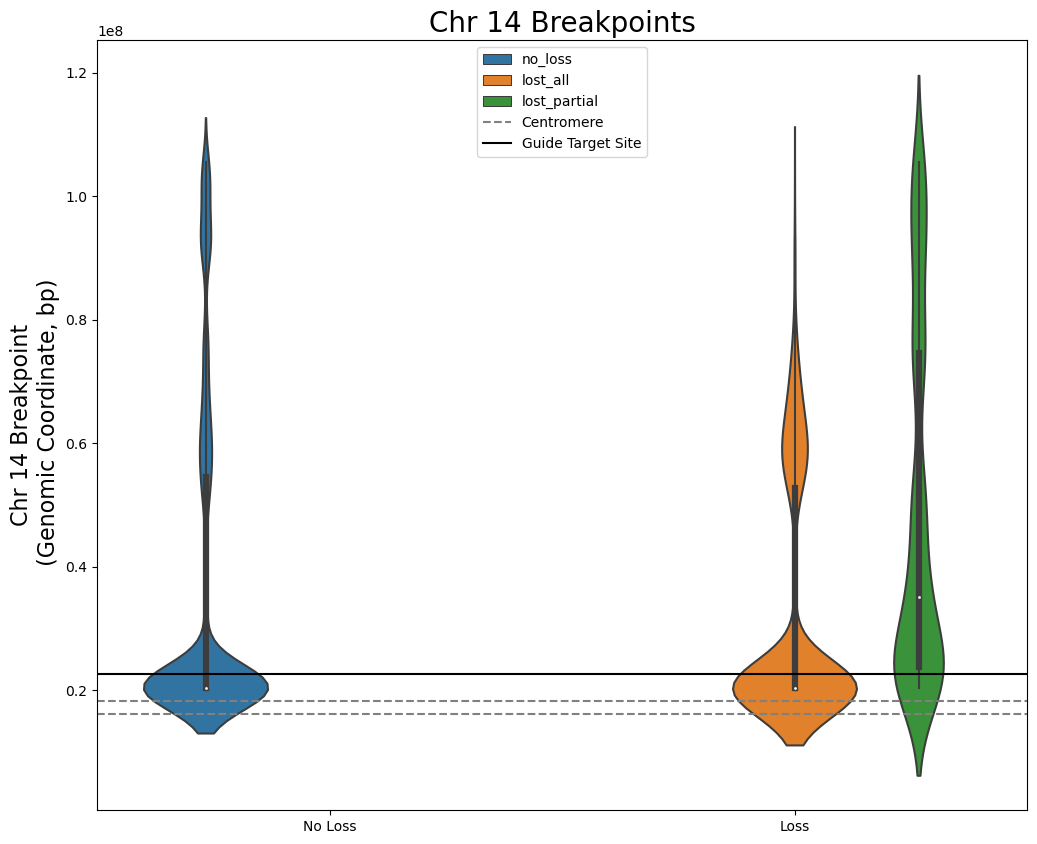

In [ ]:
merged["Has_Loss"] = "No Loss"
merged.loc[merged.chr14_event!='no_loss', "Has_Loss"] = "Loss"
plt.figure(figsize=(12,10))
graph = sns.violinplot(data=merged, x = "Has_Loss", y="chr14_bp_loc", hue="chr14_event")
graph.axhline(y = p11_1, color = 'grey', linestyle = '--', label = "Centromere")
graph.axhline(y = q14_1, color = 'grey', linestyle = '--')
graph.axhline(y = trac_midpoint, color = 'black', linestyle = '-', label = "Guide Target Site")
plt.ylabel("Chr 14 Breakpoint\n (Genomic Coordinate, bp)", size = 16)
plt.xlabel("")
plt.legend(title = None, loc= 'upper center')
plt.title("Chr 14 Breakpoints", size=20)

plt.savefig("Breakpoint_Chr14_LossVsNoLossAndTypeLoss.svg")

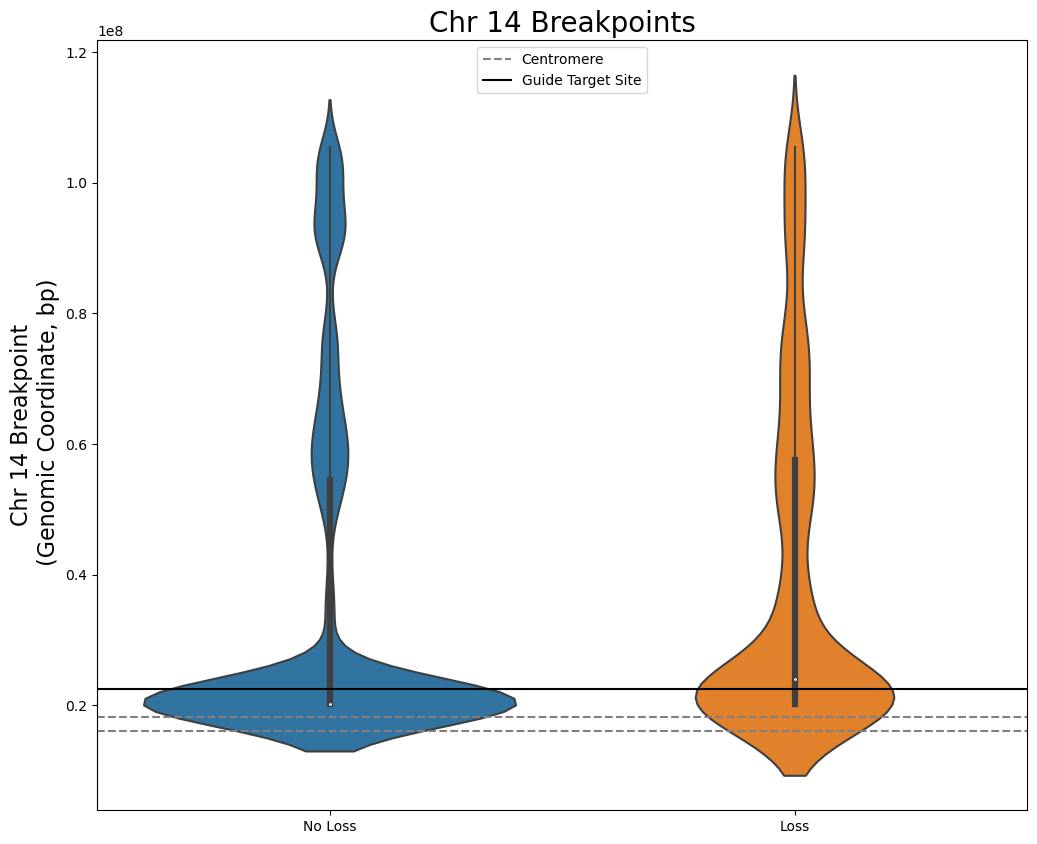

In [ ]:
merged["Has_Loss"] = "No Loss"
merged.loc[merged.chr14_event!='no_loss', "Has_Loss"] = "Loss"
plt.figure(figsize=(12,10))
graph = sns.violinplot(data=merged, x = "Has_Loss", y="chr14_bp_loc") #, hue="chr14_event")
graph.axhline(y = p11_1, color = 'grey', linestyle = '--', label = "Centromere")
graph.axhline(y = q14_1, color = 'grey', linestyle = '--')
graph.axhline(y = trac_midpoint, color = 'black', linestyle = '-', label = "Guide Target Site")
plt.ylabel("Chr 14 Breakpoint\n (Genomic Coordinate, bp)", size = 16)
plt.xlabel("")
plt.legend(title = None, loc= 'upper center')
plt.title("Chr 14 Breakpoints", size=20)
plt.savefig("Breakpoint_Chr14_LossVsNoLoss.svg")
#plt.savefig("Breakpoint_Chr14_LossVsNoLossAndTypeLoss.svg")

In [ ]:
merged.Has_Loss.value_counts()

Has_Loss
No Loss    22112
Loss        2371
Name: count, dtype: int64

In [ ]:
##################################### STRAND #####################################

In [ ]:
temp = merged[["guides", "chr14_event", "Has_Loss"]]
print("Guides: ", list(temp.guides.unique()))
temp["Strand"] = temp.guides.apply(lambda x: x.split("_")[-1])
temp.loc[temp.Strand == 'BioRxiv/June', 'Strand'] = "+"
temp = temp.loc[temp.Strand != 'Non-targeting']
print("Strand Check: ",temp.Strand.unique())
print("Num Cells with Guide by Strand:\n", temp.Strand.value_counts())

# pd.DataFrame(temp.groupby(["guides", "Strand"])["Has_Loss"].value_counts()) #plot.bar(x="Strand")

Guides:  ['GACACCTTCTTCCCCAGCCC_+', 'TTCTTCCCCAGCCCAGGTAA_+', 'AACAAATGTGTCACAAAGTA_+', 'CTTCAAGAGCAACAGTGCTG_+', 'GCTGGTACACGGCAGGGTCA_-', 'TCTCTCAGCTGGTACACGGC_-', 'GAGAATCAAAATCGGTGAAT_-', 'CTTCTTCCCCAGCCCAGGTA_+', 'CTCTCAGCTGGTACACGGCA_-', 'CTTACCTGGGCTGGGGAAGA_-', 'TGTGCTAGACATGAGGTCTA_BioRxiv/June', 'Non-targeting']
Strand Check:  ['+' '-']
Num Cells with Guide by Strand:
 Strand
+    12127
-    10642
Name: count, dtype: int64


/tmp/ipykernel_2068786/3373322436.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["Strand"] = temp.guides.apply(lambda x: x.split("_")[-1])


In [ ]:
"""
#### DF FOR Fig1 H Boxplot####
i = 0
dfs = []
indices = list(temp.index)
for i in range(0, len(list(temp.guides.unique()))):
    no = temp.groupby(["guides", "Strand"])["Has_Loss"].value_counts()[0+2*i] # Even is No-Loss
    loss = temp.groupby(["guides", "Strand"])["Has_Loss"].value_counts()[1+2*i] # Odd is Loss
    pct_loss = loss/(no+loss)*100
    print(f"{indices[2*i]}", pct_loss)
    temp_df = pd.DataFrame({"Guide":indices[2*i][0],
                         "Strand":indices[2*i][1],
                         "Pct_Loss":pct_loss}, index = [0])
    dfs.append(temp_df)

final_df = pd.concat(dfs).reset_index()
#final_df.to_excel("TRAC_Strand_Losses.xlsx")
final_df.head(12)
"""

'\n#### DF FOR Fig1 H Boxplot####\ni = 0\ndfs = []\nindices = list(temp.index)\nfor i in range(0, len(list(temp.guides.unique()))):\n    no = temp.groupby(["guides", "Strand"])["Has_Loss"].value_counts()[0+2*i] # Even is No-Loss\n    loss = temp.groupby(["guides", "Strand"])["Has_Loss"].value_counts()[1+2*i] # Odd is Loss\n    pct_loss = loss/(no+loss)*100\n    print(f"{indices[2*i]}", pct_loss)\n    temp_df = pd.DataFrame({"Guide":indices[2*i][0], \n                         "Strand":indices[2*i][1], \n                         "Pct_Loss":pct_loss}, index = [0])\n    dfs.append(temp_df)\n    \nfinal_df = pd.concat(dfs).reset_index()\n#final_df.to_excel("TRAC_Strand_Losses.xlsx")\nfinal_df.head(12)\n'

# MARENA GRAPHS

In [ ]:
###################################### BREAKPOINTS ######################################

In [ ]:
all_df = merged.loc[merged.chr14_event == "lost_all"]
alls = random.sample(list(all_df.index), 12)
partial_df = merged.loc[merged.chr14_event == "lost_partial"]
partials = random.sample(list(partial_df.index), 12)
no_df = merged.loc[merged.chr14_event == "no_loss"]
nos = random.sample(list(no_df.index), 12)

gene_locs["Mid_Point"] = (gene_locs.start + gene_locs.end)/2
gene_dict = {row.gene:row.Mid_Point for row in gene_locs.itertuples()}

/tmp/ipykernel_2068786/2088024241.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chr14_infercnv["Gene_Loc_MidPoint"] = [gene_dict[x] for x in chr14_infercnv.index]


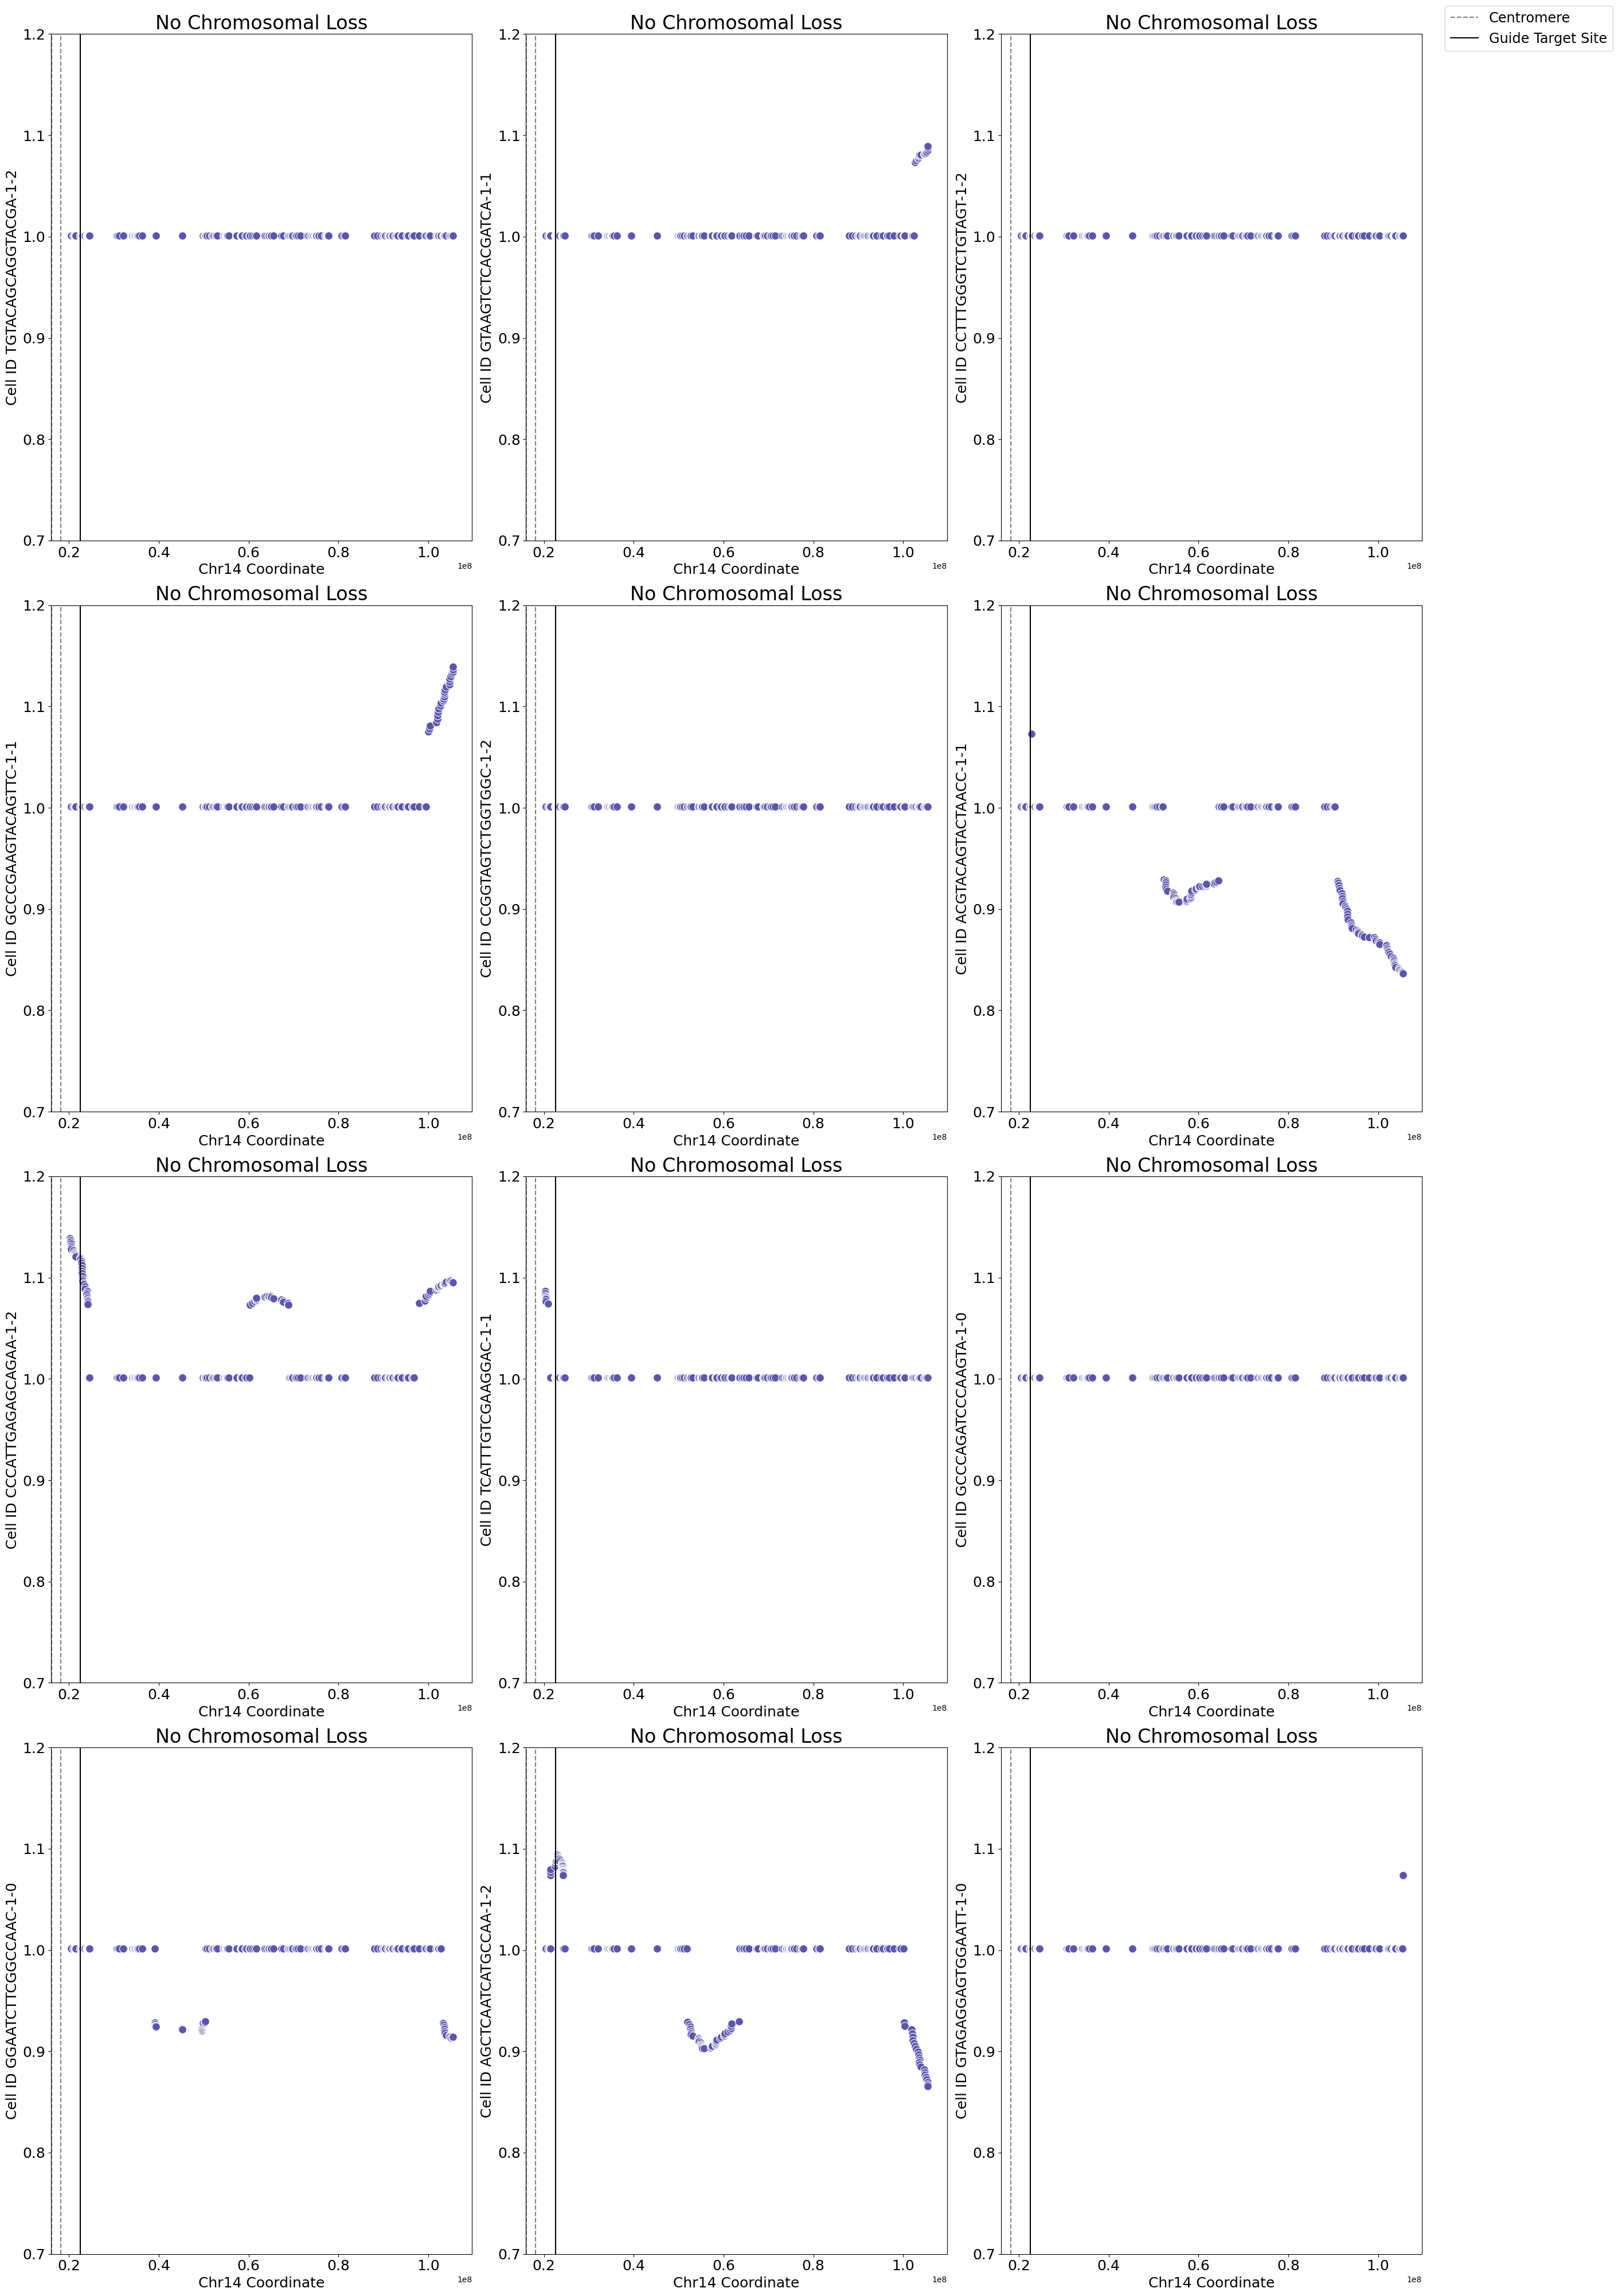

In [ ]:
fig, ax = plt.subplots(nrows = 4, ncols = 3, figsize = (25,40))
axes = ax.ravel()
dark_blue = (90, 86, 174, 1)
chr14_infercnv = infercnv_raw.loc[infercnv_raw.chrom == "chr14"]
chr14_infercnv["Gene_Loc_MidPoint"] = [gene_dict[x] for x in chr14_infercnv.index]
for i, no in enumerate(nos):
    temp = chr14_infercnv.loc[:, [no, "Gene_Loc_MidPoint"]]
    break_pt = adata.obs.loc[no].chr14_bp_loc
    graph = sns.scatterplot(x = "Gene_Loc_MidPoint", y = no, data = temp,
                            ax = axes[i], s=100, c=["#5a56ae"])
    graph.axvline(x = p11_1, color = 'grey', linestyle = '--', label = "Centromere")
    graph.axvline(x = q14_1, color = 'grey', linestyle = '--')
    graph.axvline(x = trac_midpoint, color = 'black', linestyle = '-',
                  label = "Guide Target Site")
    #graph.axvline(x = break_pt, color = 'red', linestyle = '-',
    #              label = "Break Point")
    axes[i].tick_params(axis='both', labelsize=18)
    axes[i].set_xlabel("Chr14 Coordinate", size=18)
    axes[i].set_ylabel(f"Cell ID {no}", size=18)
    axes[i].set_title("No Chromosomal Loss", size = 24)
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels,
          bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0, fontsize = "xx-large")
plt.setp(axes, ylim=[0.7,1.2])
plt.tight_layout()
#plt.savefig("NoLoss_InferCNV_Definition_Examples.svg", bbox_inches='tight')


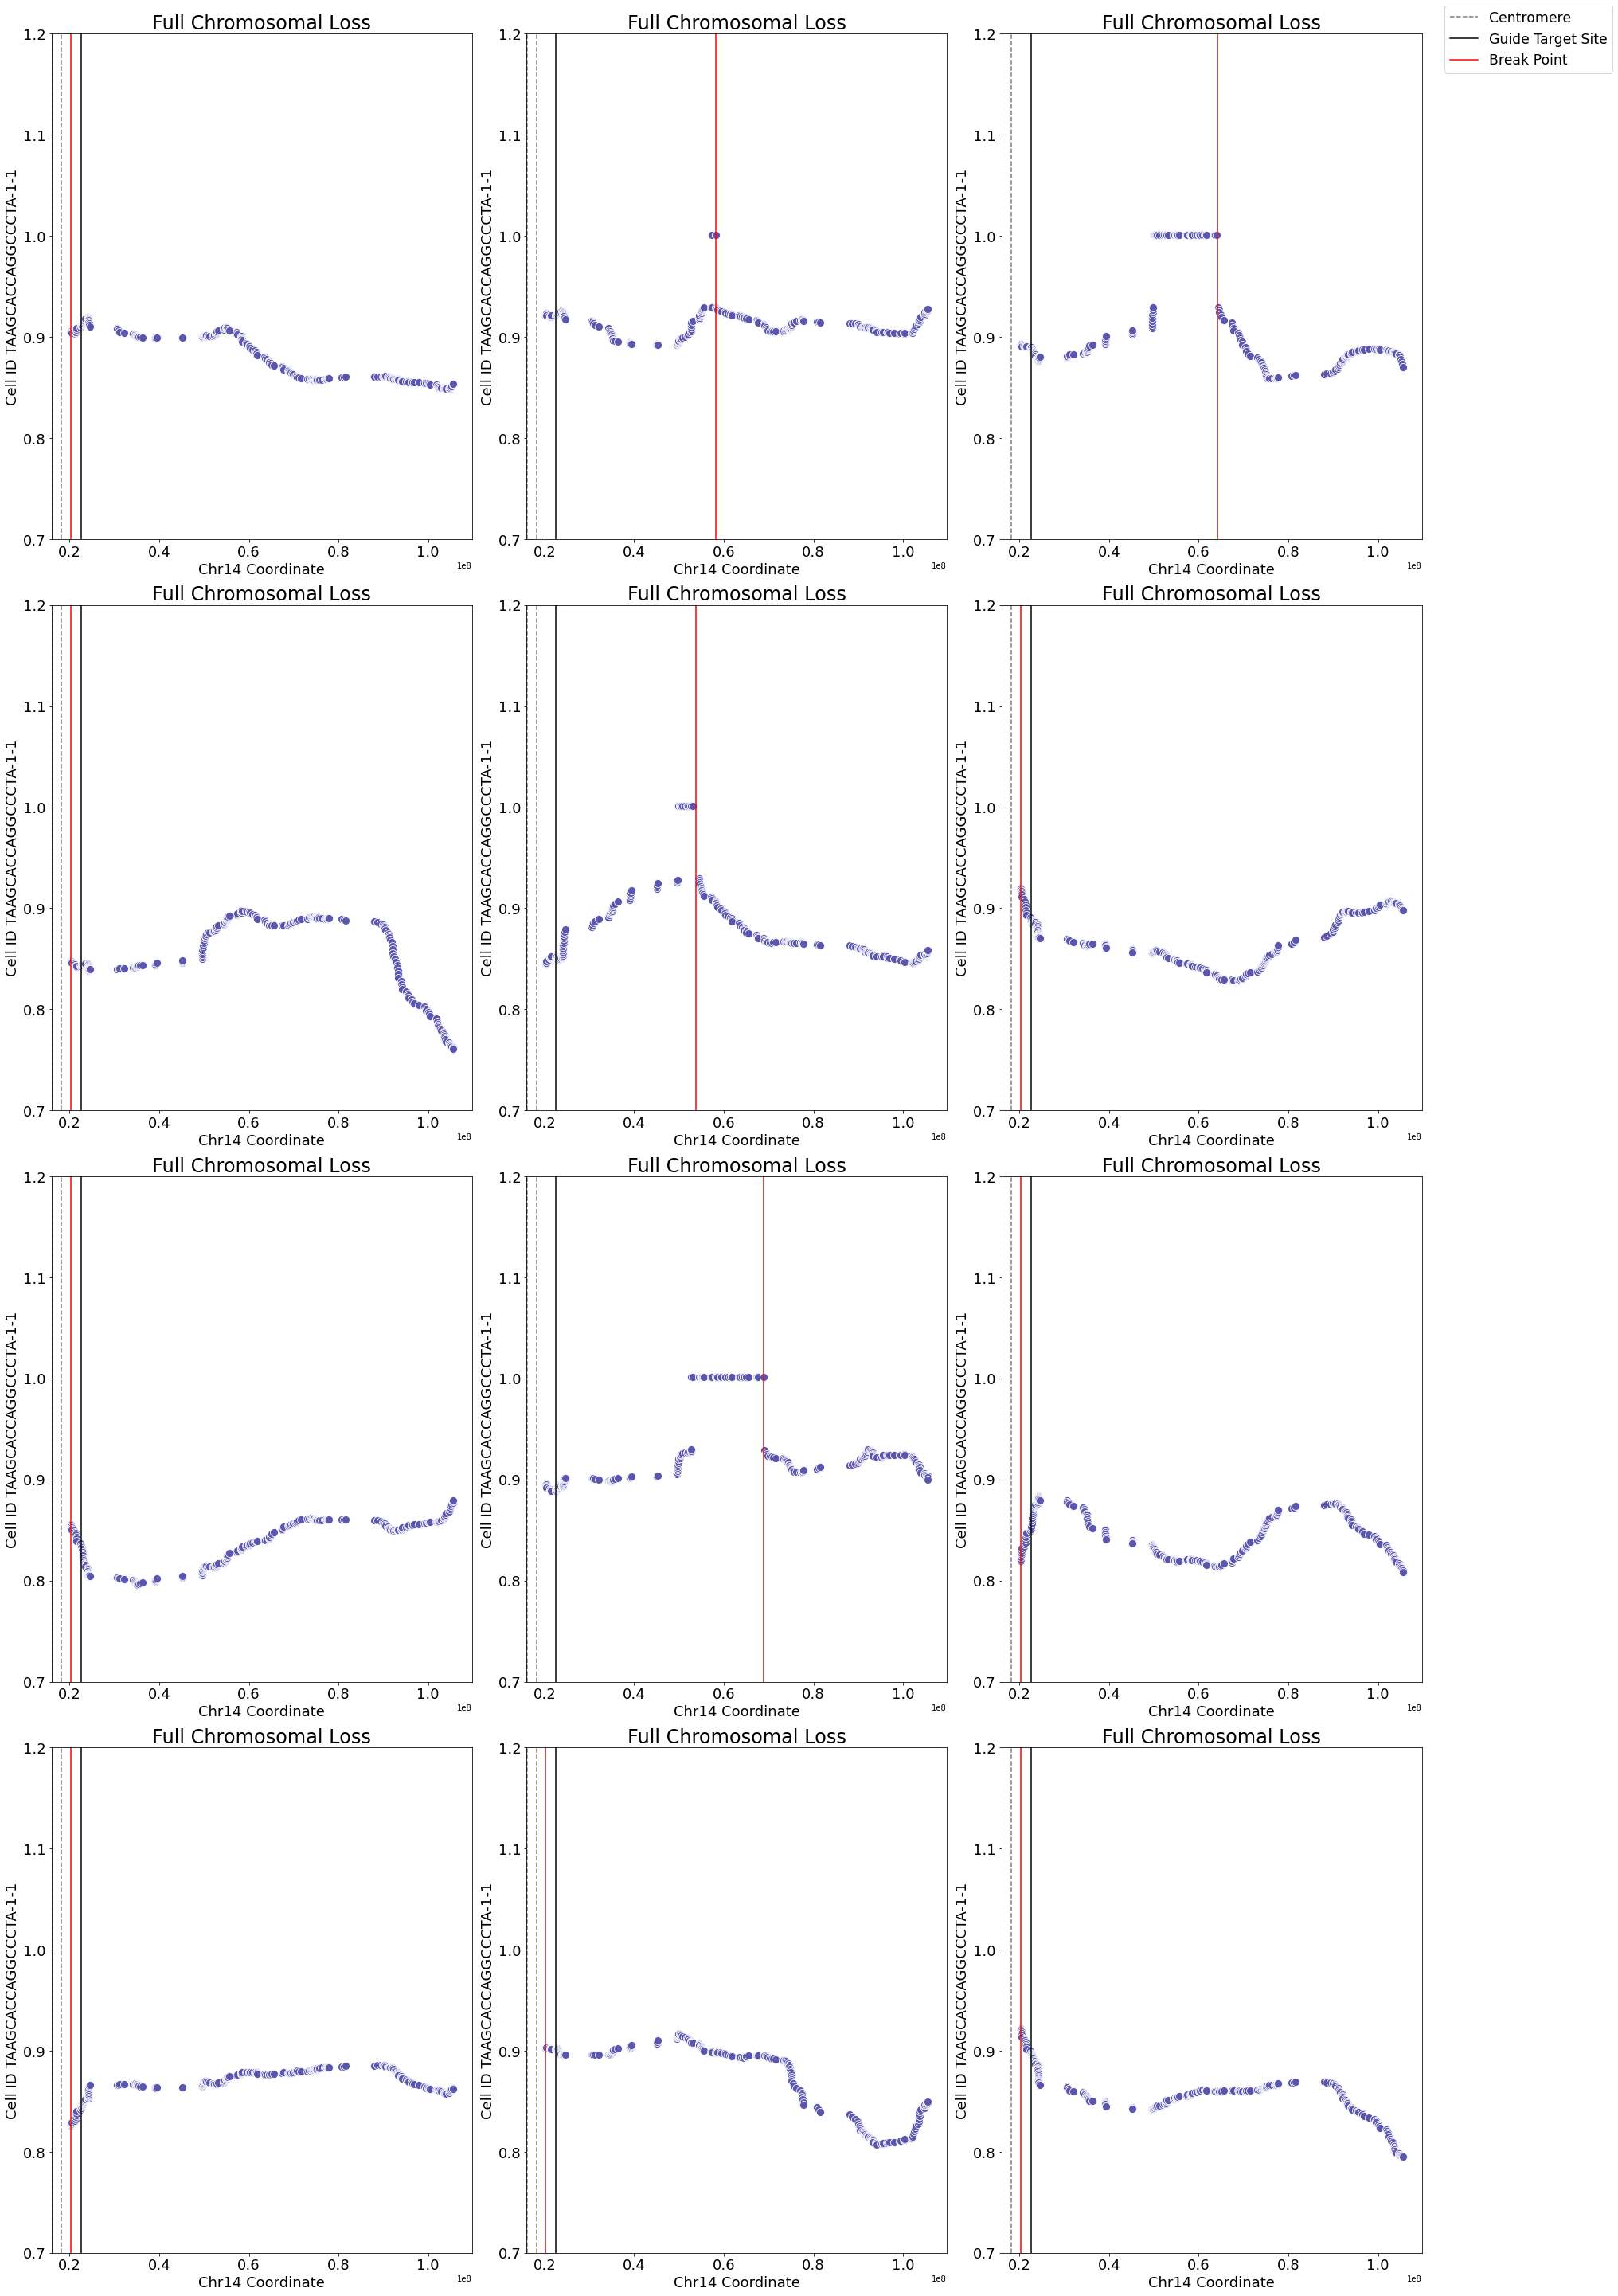

In [ ]:
fig, ax = plt.subplots(nrows = 4, ncols = 3, figsize = (25,40))
axes = ax.ravel()

for i, all in enumerate(alls):
    temp = chr14_infercnv.loc[:, [all, "Gene_Loc_MidPoint"]]
    break_pt = adata.obs.loc[all].chr14_bp_loc
    graph = sns.scatterplot(x = "Gene_Loc_MidPoint", y = all, data = temp,
                            ax = axes[i], s=100, c = ["#5a56ae"])
    graph.axvline(x = p11_1, color = 'grey', linestyle = '--', label = "Centromere")
    graph.axvline(x = q14_1, color = 'grey', linestyle = '--')
    graph.axvline(x = trac_midpoint, color = 'black', linestyle = '-',
                  label = "Guide Target Site")
    graph.axvline(x = break_pt, color = 'red', linestyle = '-',
                  label = "Break Point")
    axes[i].tick_params(axis='both', labelsize=18)
    axes[i].set_xlabel("Chr14 Coordinate", size=18)
    axes[i].set_ylabel(f"Cell ID {no}", size=18)
    axes[i].set_title("Full Chromosomal Loss", size = 24)

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels,
          bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0, fontsize = "xx-large")
plt.setp(axes, ylim=[0.7,1.2])
plt.tight_layout()
#plt.savefig("AllLoss_InferCNV_Definition_Examples.svg", bbox_inches='tight')


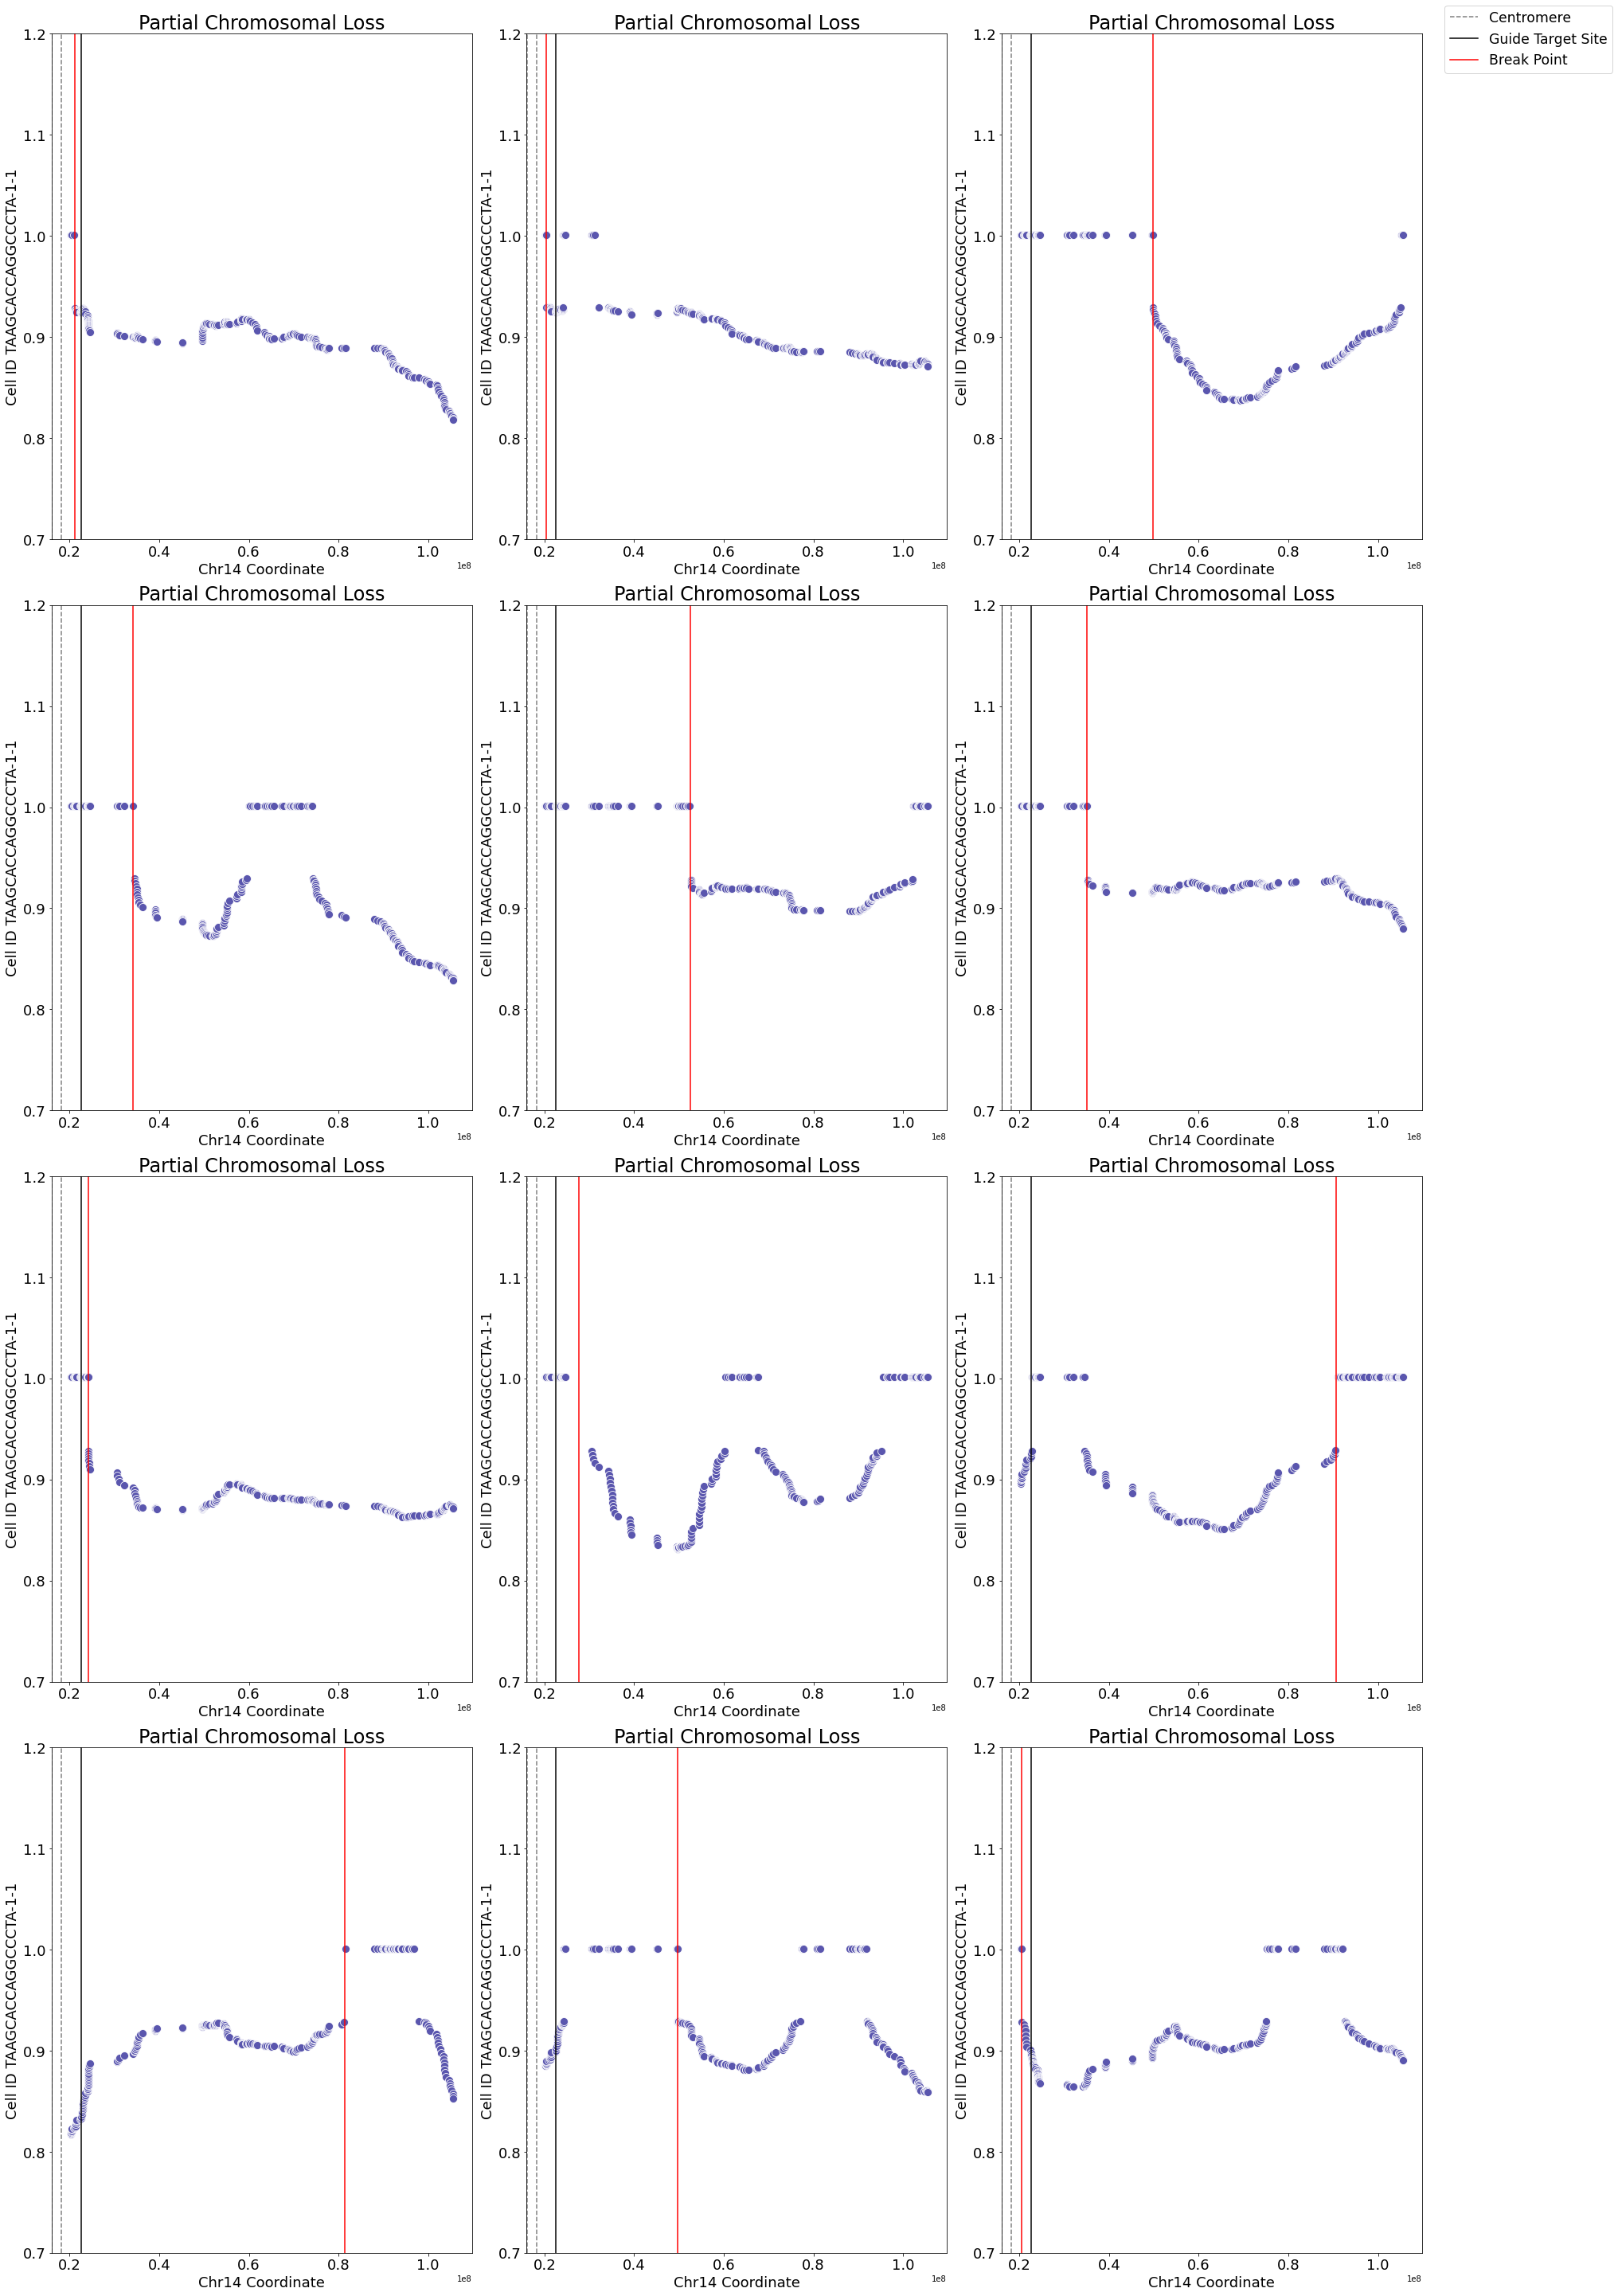

In [ ]:
fig, ax = plt.subplots(nrows = 4, ncols = 3, figsize = (25,40))
axes = ax.ravel()

for i, partial in enumerate(partials):
    temp = chr14_infercnv.loc[:, [partial, "Gene_Loc_MidPoint"]]
    break_pt = adata.obs.loc[partial].chr14_bp_loc
    graph = sns.scatterplot(x = "Gene_Loc_MidPoint", y = partial, data = temp,
                            ax = axes[i], s=100, c = ["#5a56ae"])
    graph.axvline(x = p11_1, color = 'grey', linestyle = '--', label = "Centromere")
    graph.axvline(x = q14_1, color = 'grey', linestyle = '--')
    graph.axvline(x = trac_midpoint, color = 'black', linestyle = '-',
                  label = "Guide Target Site")
    graph.axvline(x = break_pt, color = 'red', linestyle = '-',
                  label = "Break Point")
    axes[i].tick_params(axis='both', labelsize=18)
    axes[i].set_xlabel("Chr14 Coordinate", size=18)
    axes[i].set_ylabel(f"Cell ID {no}", size=18)
    axes[i].set_title("Partial Chromosomal Loss", size = 24)

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels,
          bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0, fontsize = "xx-large")
plt.setp(axes, ylim=[0.7,1.2])
plt.tight_layout()
#plt.savefig("partialLoss_InferCNV_Definition_Examples.svg", bbox_inches='tight')
